# IQ representation of a signal

### Setting up our libraries

In [1]:
import math

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

A carrier signal is usually a **sinusoidal waveform** that is modulated in order to convey information. Assume a signal having the following form: $A(t)\sin[2\pi f t + \phi(t)]$.

We can change either the phase $\phi(t)$, frequency $f$, amplitude $A(t)$ or a combination thereof.

By recalling the basic trigonometric identities we end up with:

$A(t)\sin[2\pi f t + \phi(t)] = \underbrace{A(t)\sin[2\pi f t]\cos[\phi(t)]}_{\text{in-phase}} + \underbrace{A(t)\sin[2\pi f t + \frac{\pi}{2}]\cos[\phi(t)]}_{\text{quadrature}}$

Before we delve further in how we can leverage the notation, we have to take a refresher on complex numbers and **Euler's Identity** which is pretty much the foundation for IQ representation and usage of complex analysis in signal processing in general.


## Complex Numbers


Complex numbers are believed to be formally introduced by Cardano when attempting to find a solution to the general case of cubic equations (for slightly more historical details refer [here](https://www.math.uri.edu/~merino/spring06/mth562/ShortHistoryComplexNumbers2006.pdf)).

In essence, complex numbers are nothing more than numbers of the form $a + bi$ where $a, b \in 	\mathbb{R}$ and $i$ has the property $i^2 = -1$.

Python's `cmath` [library](https://docs.python.org/3/library/cmath.html) gives us a toolset to handle complex numbers. However, we'll try to build a simple class for handling complex numbers from scratch in order to solidify our knowledge.

In [2]:
class Complex:
    
    def __init__(self, a, b):
        if type(a) not in [float, int] and type(b) not in [float, int]:
            raise ValueError("a and b have to be real numbers")
        self.a = a
        self.b = b
    
    def __str__(self):
        if self.b == 0:
            return str(self.a)
        
        sign = lambda a: ("+", "-")[a<0]
        return str(self.a) + " " + sign(self.b) + " " + str(abs(self.b))+"i"

All this allowed us to do is create a very simple class who takes two arguments $a$ and $b$, defining the real and imaginary part of the complex number and providing a simple method for easily printing our number. Let's test this out!

In [3]:
a = 1  # real part
b = -2 # imaginary part

z = Complex(a, b)
print(z)

1 - 2i


The code does as expected of it but it's hard to gain intuition of how important and intuitive complex numbers can be without a means of visualizing them. Well it turns out the most obvious and also useful way to think about complex numbers is as vectors on the 2D plane, the $x$ and $y$ axes usually denoting the real and imaginary part respectively.

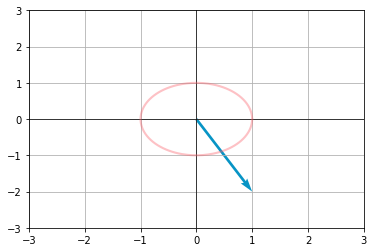

In [4]:
def display(self):
    fig, ax = plt.subplots()
    lmt = int(1.5*max(abs(a), abs(b)))
    plt.xlim([-lmt, lmt])
    plt.ylim([-lmt, lmt])
    
    plt.rcParams['grid.alpha'] = 0.5
    plt.rcParams['grid.color'] = "#cccccc"
    plt.grid(True)
    
    ax.axvline(x=0, color='k', linewidth = 0.7)
    ax.axhline(y=0, color='k', linewidth = 0.7)
    
    t = np.linspace(0,np.pi*2,200)
    ax.plot(np.cos(t), np.sin(t), linewidth=2.1, color = "#fb646e", alpha = 0.4)
    plt.quiver(0, 0, a, b, color = "#0794c5", angles='xy', scale_units='xy', scale=1, width = 0.008)
    
Complex.display = display

z.display()

Now that we have represented complex numbers as vectors it males sense to borrow some elementary concepts from linear algebra such as the magnitude and angle of vector (which is easy to think why those two properties uniquely define a 2D vector). For those who need a quick reference, the magnitude of a vector $\vec{u} = (x, y)$ is given y $\sqrt{x^2 + y^2}$ why the angle $\phi$ is given by $\tan^{-1}{(\frac{b}{a})}$

Note that the red circle indicates the unit circle which will bother us in a bit.

In [5]:
def magnitude(self):
    return np.sqrt(self.a**2 + self.b**2)

Complex.magnitude = magnitude

z.magnitude()

2.23606797749979

In [6]:
def angle(self):
    if self.a == 0:
        return 0
    return np.arctan(b/a)

Complex.angle = angle

z.angle() # Note that the value returned is in [rad]

-1.1071487177940904

Now let's take a step back and recall the **Euler's Identity** we were talking about earlier. All you need to prove it is familiarity with **Taylor's Expansion**:

$$e^{iφ} = \frac{1}{0!} + \frac{i\phi}{1!} + \frac{(i\phi)^2}{2!} + \frac{(i\phi)^3}{3!} + \frac{(i\phi)^4}{4!} + ... = $$

$$ = \color{red}{\frac{1}{0!}} + \color{green}{i\frac{\phi}{1!}} - \color{red}{\frac{\phi^2}{2!}} - \color{green}{i\frac{\phi^3}{3!}} + ... $$

If we recall Taylor's expansion for the trigonometric functions we can easily derive the following result:

$$e^{i\phi} = \color{red}{\cos\phi} + \color{green}{i\sin\phi}$$

This result gives is fundamental in establishing the **polar form** of a signal. We can see that we can easily incorporate the *amplitude* in the polar form by simply multiplying both sides with an amplitude $A$:

$$Ae^{i\phi} = A\cos\phi + iA\sin\phi$$

This also explaines the so-called "most beautiful equation": $e^{i\pi} + 1 = 0$. $e^{i\pi}$ just represents a 180 degree shift in the complex unit cycle.



## Polar Notation for signals in the time domain

We will now go back to the beginning and consider the simplest case of a carrier-signal with frequency $f_0$, unit amplitude and zero phase which is represented in polar form as $e^{2\pi f_0t}$. If you're wondering why we multiply with $2\pi$ just remember that we want to count frequency in radians per time unit (conventionally seconds). 

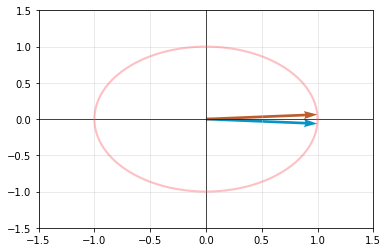

In [7]:
fig, ax = plt.subplots()

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['grid.color'] = "#cccccc"
plt.grid(True)

vector_pos0 = [1, 0]
vector_pos1 = [1, 0]

ax.axvline(x=0, color='k', linewidth = 0.7)
ax.axhline(y=0, color='k', linewidth = 0.7)

t = np.linspace(0,np.pi*2,200)
f0 = 2/len(t) # frequency
f1 = -2/len(t)

ax.plot(np.cos(t), np.sin(t), linewidth=2.1, color = "#fb646e", alpha = 0.4)
l, = ax.plot([],[])
quiver0 = plt.quiver(0, 0, vector_pos0[0], vector_pos0[1], color = "#0794c5", angles='xy', scale_units='xy', scale=1, width = 0.008)
quiver1 = plt.quiver(0, 0, vector_pos1[0], vector_pos1[1], color = "#BC5D2E", angles='xy', scale_units='xy', scale=1, width = 0.008)

def animate(i):
        quiver0.set_UVC(np.cos(2*np.pi*f0*i), np.sin(2*np.pi*f0*i))
        quiver1.set_UVC(np.cos(2*np.pi*f1*i), np.sin(2*np.pi*f1*i))

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))
HTML(ani.to_jshtml())

The main importance of the IQ representation is the fact it allows us to distinguish between negative and positive frequencies which would for example allow us to easily remove the ambiguity in the output of the mixer (which give one positive and one negative frequency component). As an additional bonus, it also allows us to sample at half the sample rate we would need for a simple real representation of the signal.